
/*
 * Author :Bashir Sadat.
 * Porject: Clustering Algorithms, Kmeans and Spectral Clustering
 *
 * Permission is hereby granted, free of charge, to any person obtaining a copy
 * of this software and associated documentation files (the "Software"), to deal
 * in the Software without restriction, including without limitation the rights
 * to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
 * copies of the Software, and to permit persons to whom the Software is
 * furnished to do so, subject to the following conditions:
 *
 * The above copyright notice and this permission notice shall be included in
 * all copies or substantial portions of the Software.
 *
 */

 Datasets: Cho and Iyer are gene sequences datasets which need to be clustered according to the similar gene pat- terns. You can download them at: https://drive.google.com/open?id=1I00QuYllu0ahnEy-hkEN_MTwATm2uXiZ and https://drive.google.com/open?id=1KHTaMp_9yfID6Qlwg1YsLnfmwu2g2C7A.
A short description of the datasets can be found at https://drive.google.com/open?id=1Nm7lbYSUsIp8cFGq7UQmgJUhCcY2yuqT.

Complete the following tasks:
• Implement k-means and spectral clustering algorithms to find clusters of genes which exhibit similar expression profiles. Compare the two methods and discuss their pros and cons.

We validate the clustering results using the following methods:
• Choose an external index and compare the clustering results from different clustering algorithms with an external index (the ground truth clusters are provided in the data sets).
• Choose an internal index and compare the clustering results.

The project includes the following:
• Code: Two clustering algorithms implemented with two functions, respectively. 
• Report: Described the flow of all the implemented algorithms. Compare the performance of these approaches using external and internal index on the two given datasets. At the end I stated the pros and cons of each algorithm and exlained my findings from the experiments.





###################################### Cho and Iyer datasets ######################################

Cho and Iyer datasets are collected from UCI machine learning repository. The format of datasets are:

Each row represents a gene:

1) The first column is gene_id

2) The second column is the ground truth clusters. You can compare it with your results. "-1" means outliers.

3) The rest columns represent gene's expression values (attributes).

# Kmeans Clustering

Uploading the files

In [1]:
from google.colab import files
uploaded = files.upload()


Saving cho.csv to cho (4).csv
Saving iyer.csv to iyer (4).csv


In [0]:
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.cluster import SpectralClustering 
from sklearn.preprocessing import StandardScaler, normalize 
from sklearn.decomposition import PCA 
from sklearn.metrics import silhouette_score 

In [0]:
iyer = pd.read_csv('iyer.csv') 
cho = pd.read_csv('cho.csv') 

In [0]:
# Dropping the CUST_ID column from the data 
X = cho.drop(['1',"1.1"], axis = 1) 

In [0]:
Z = iyer.drop(['1',"-1", "1.1"], axis = 1) 

This data cleaner reduced the dimensionality of the data to two dimensions to be able to plot and see the graph. Later we apply the algorithms on all dimensions of the data.

In [0]:
def data_cleaner(self):
  # Handling the missing values if any 
  self.fillna(method ='ffill', inplace = True) 
    
  # Scaling the Data 
  scaler = StandardScaler() 
  self._scaled = scaler.fit_transform(self) 
  # Normalizing the Data 
  self._normalized = normalize(self._scaled)
  # Converting the numpy array into a pandas DataFrame 
  self._normalized = pd.DataFrame(self._normalized) 
  # Reducing the dimensions of the data 
  pca = PCA(n_components = 2) 
  self._principal = pca.fit_transform(self._normalized) 
  self._principal = pd.DataFrame(self._principal) 
  self._principal.columns = ['P1', 'P2'] 
  # Standardize the data
  self._std = StandardScaler().fit_transform(self._principal)
  
  return self._std 

In [7]:
X_std = data_cleaner(X)
Z_std = data_cleaner(Z)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
/usr/local/lib/python3.6/dist-packages/ipyker

In [8]:
# Modules
import matplotlib.pyplot as plt
from matplotlib.image import imread
import pandas as pd
import seaborn as sns
from sklearn.datasets.samples_generator import (make_blobs,
                                                make_circles,
                                                make_moons)
from sklearn.cluster import KMeans, SpectralClustering
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_samples, silhouette_score 

def plot_raw (self):
  %matplotlib inline
  sns.set_context('notebook')
  plt.style.use('fivethirtyeight')
  from warnings import filterwarnings
  filterwarnings('ignore')

  # Plot the data
  plt.figure(figsize=(6, 6))
  plt.scatter(self[:, 0], self[:, 1])
  plt.xlabel('P1')
  plt.ylabel('P2')
  plt.title('Visualization of both');

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


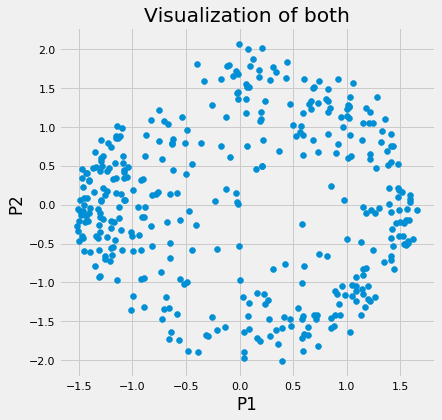

In [9]:
plot_raw (X_std)

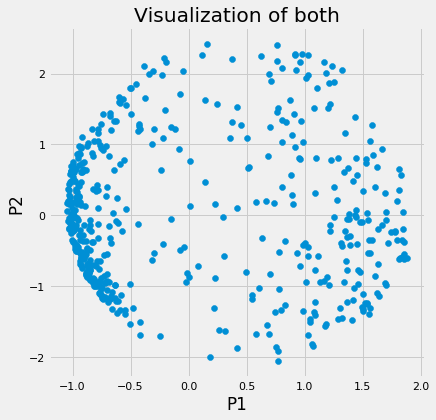

In [10]:
plot_raw(Z_std)

In this section, we implemented the Kmeans algorithm. I used different sources to completed this code.

In [0]:
import numpy as np
from numpy.linalg import norm


class Kmeans:
    '''Implementing Kmeans algorithm.'''

    def __init__(self, n_clusters, max_iter=100, random_state=123):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.random_state = random_state

    def initializ_centroids(self, X):
        np.random.RandomState(self.random_state)
        random_idx = np.random.permutation(X.shape[0])
        centroids = X[random_idx[:self.n_clusters]]
        return centroids

    def compute_centroids(self, X, labels):
        centroids = np.zeros((self.n_clusters, X.shape[1]))
        for k in range(self.n_clusters):
            centroids[k, :] = np.mean(X[labels == k, :], axis=0)
        return centroids

    def compute_distance(self, X, centroids):
        distance = np.zeros((X.shape[0], self.n_clusters))
        for k in range(self.n_clusters):
            row_norm = norm(X - centroids[k, :], axis=1)
            distance[:, k] = np.square(row_norm)
        return distance

    def find_closest_cluster(self, distance):
        return np.argmin(distance, axis=1)

    def compute_sse(self, X, labels, centroids):
        distance = np.zeros(X.shape[0])
        for k in range(self.n_clusters):
            distance[labels == k] = norm(X[labels == k] - centroids[k], axis=1)
        return np.sum(np.square(distance))
    
    def fit(self, X):
        self.centroids = self.initializ_centroids(X)
        for i in range(self.max_iter):
            old_centroids = self.centroids
            distance = self.compute_distance(X, old_centroids)
            self.labels = self.find_closest_cluster(distance)
            self.centroids = self.compute_centroids(X, self.labels)
            if np.all(old_centroids == self.centroids):
                break
        self.error = self.compute_sse(X, self.labels, self.centroids)
    
    def predict(self, X):
        distance = self.compute_distance(X, old_centroids)
        return self.find_closest_cluster(distance)

Now we call the Kmeans algorithm on cho dataset which is called X_std after being cleaned and reduced dimensions

In [0]:
# Run local implementation of kmeans on cho dataset
km = Kmeans(n_clusters=5, max_iter=100)
km.fit(X_std)
centroids = km.centroids

We can see in the bellow graph how the data is being clustered later we will find the number of clusters. I choose the current number of clusters based on tehe dataset ground truht column. 

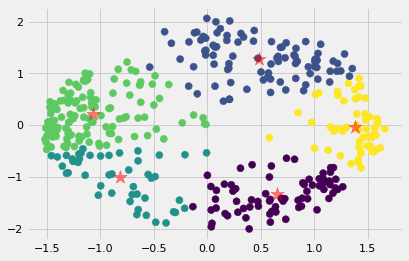

In [13]:
plt.scatter(X_std[:, 0], X_std[:, 1], c=km.labels,
            s=50, cmap='viridis');
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', c="r", s=200, alpha=0.5);

Now we call the Kmeans algorithm on iyer dataset which is called Z_std after being cleaned and reduced dimensions

In [0]:
# Run local implementation of kmeans on iyer dataset
km2 = Kmeans(n_clusters=10, max_iter=100)
km2.fit(Z_std)
centroids2 = km.centroids

In [15]:
centroids2

array([[ 0.65216348, -1.33637017],
       [ 0.48808958,  1.26954129],
       [-0.8192155 , -1.01043412],
       [-1.069686  ,  0.22483175],
       [ 1.37905436, -0.02916329]])

We can see in the bellow graph how the data is being clustered later we will find the number of clusters.  I choose the current number of clusters based on the dataset ground truth column.


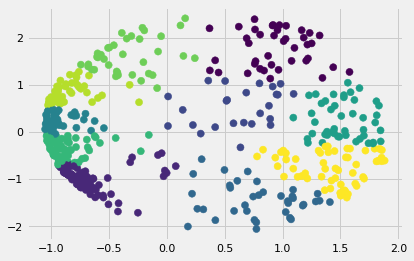

In [16]:
plt.scatter(Z_std[:, 0], Z_std[:, 1], c=km2.labels, s=50, cmap='viridis');
#plt.scatter(centroids2[:, 0], centroids2[:, 1], marker='*', cmap="viridis", s=200, alpha=0.5);

Let's find out what is the right number of clusters to cluster this data

In [0]:
def det_cluster_n(self, last_k):
  # Run the Kmeans algorithm and get the index of data points clusters
  sse = []
  list_k = list(range(1, last_k))

  for k in list_k:
      km = KMeans(n_clusters=k)
      km.fit(self)
      sse.append(km.inertia_)

  # Plot sse against k
  plt.figure(figsize=(6, 6))
  plt.plot(list_k, sse, '-o')
  plt.xlabel(r'Number of clusters *k*')
  plt.ylabel('Sum of squared distance');

The graph below shows that 4 or 5 can be good number of clusters for the cho dataset

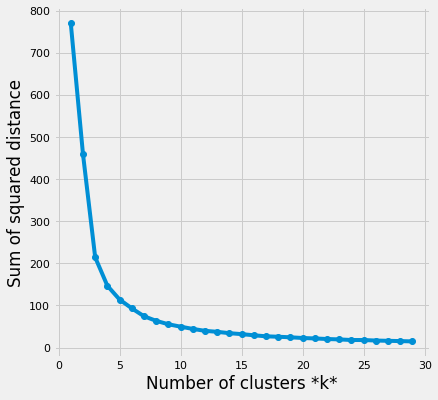

In [18]:
#the right number of clusters for cho dataset
det_cluster_n(X_std, 30)

We can say that any number between 5-10 can be a good number of clusters. while the ground truth clusters are 10, I don't recommend 10 clusters. somewhere around 7 could be a middle ground.

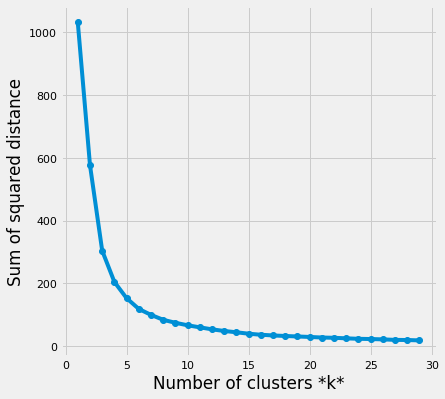

In [19]:
#the right number of clusters for iyer dataset
det_cluster_n(Z_std, 30)

Now lets do the silhout analysis to find out how good is our clustering

Clustering validation
Silhouette plot
Recall that the silhouette coefficient (Si) measures how similar an object i is to the the other objects in its own cluster versus those in the neighbor cluster. Si values range from 1 to - 1:

A value of Si close to 1 indicates that the object is well clustered. In the other words, the object i is similar to the other objects in its group.
A value of Si close to -1 indicates that the object is poorly clustered, and that assignment to some other cluster would probably improve the overall results.

source: https://www.datanovia.com/en/lessons/cluster-validation-statistics-must-know-methods/

In [0]:
def silhouette_analysis (self):
  for i, k in enumerate([2, 3, 4, 6,8,10]):
      fig, (ax1, ax2) = plt.subplots(1, 2)
      fig.set_size_inches(18, 7)
      
      # Run the Kmeans algorithm
      km = KMeans(n_clusters=k)
      labels = km.fit_predict(self)
      centroids = km.cluster_centers_

      # Get silhouette samples
      silhouette_vals = silhouette_samples(self, labels)

      # Silhouette plot
      y_ticks = []
      y_lower, y_upper = 0, 0
      for i, cluster in enumerate(np.unique(labels)):
          cluster_silhouette_vals = silhouette_vals[labels == cluster]
          cluster_silhouette_vals.sort()
          y_upper += len(cluster_silhouette_vals)
          ax1.barh(range(y_lower, y_upper), cluster_silhouette_vals, edgecolor='none', height=1)
          ax1.text(-0.03, (y_lower + y_upper) / 2, str(i + 1))
          y_lower += len(cluster_silhouette_vals)

      # Get the average silhouette score and plot it
      avg_score = np.mean(silhouette_vals)
      ax1.axvline(avg_score, linestyle='--', linewidth=2, color='green')
      ax1.set_yticks([])
      ax1.set_xlim([-0.1, 1])
      ax1.set_xlabel('Silhouette coefficient values')
      ax1.set_ylabel('Cluster labels')
      ax1.set_title('Silhouette plot for the various clusters', y=1.02);
      
      # Scatter plot of data colored with labels
      ax2.scatter(self[:, 0], self[:, 1], c=labels)
      ax2.scatter(centroids[:, 0], centroids[:, 1], marker='*', c='r', s=250)
      ax2.set_xlim([-2, 2])
      ax2.set_xlim([-2, 2])
      ax2.set_xlabel('First thing')
      ax2.set_ylabel('Second thing')
      ax2.set_title('Visualization of clustered data', y=1.02)
      ax2.set_aspect('equal')
      plt.tight_layout()
      plt.suptitle(f'Silhouette analysis using k = {k}',
                  fontsize=16, fontweight='semibold', y=1.05);

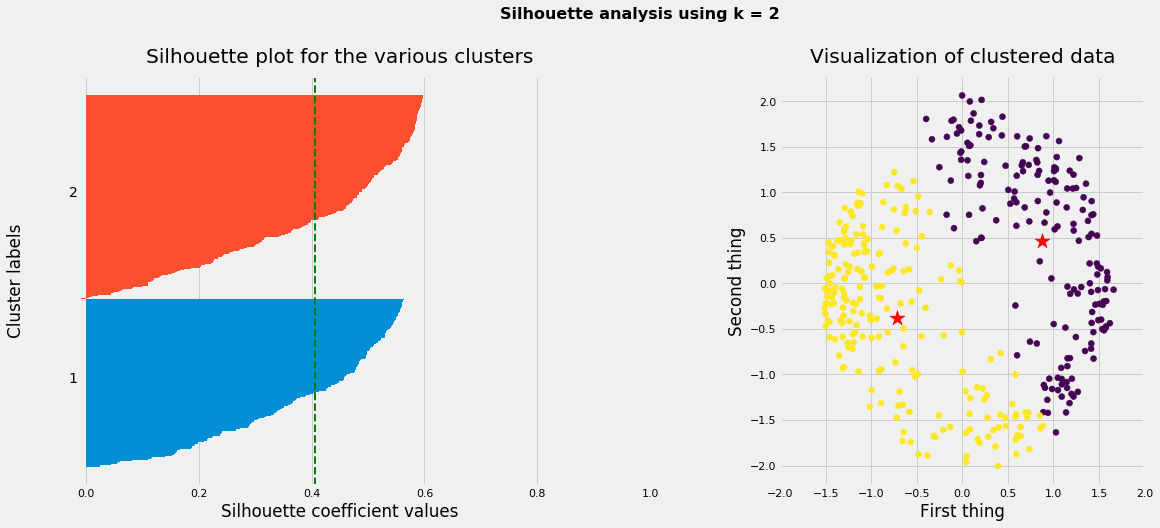

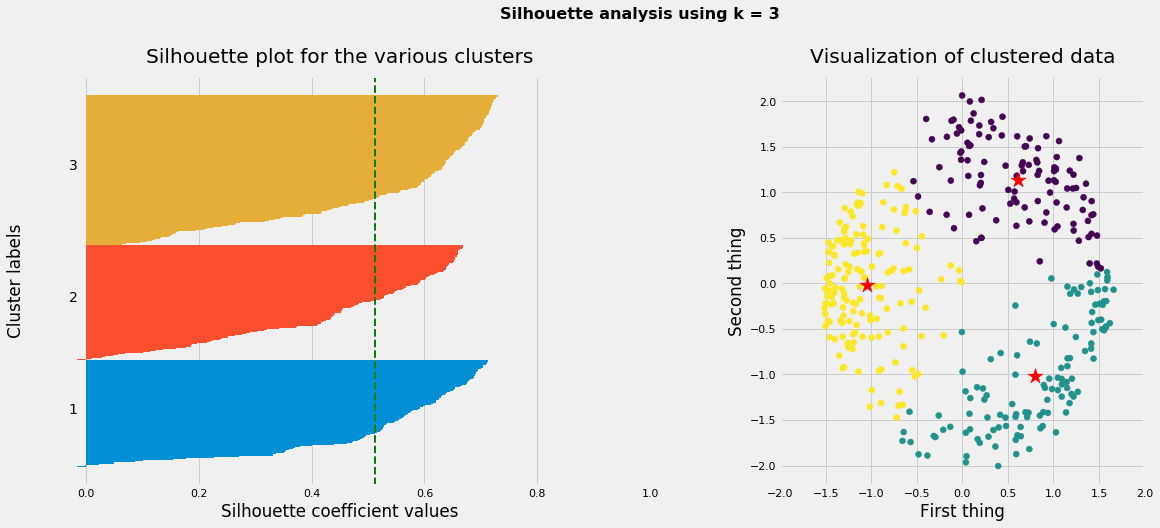

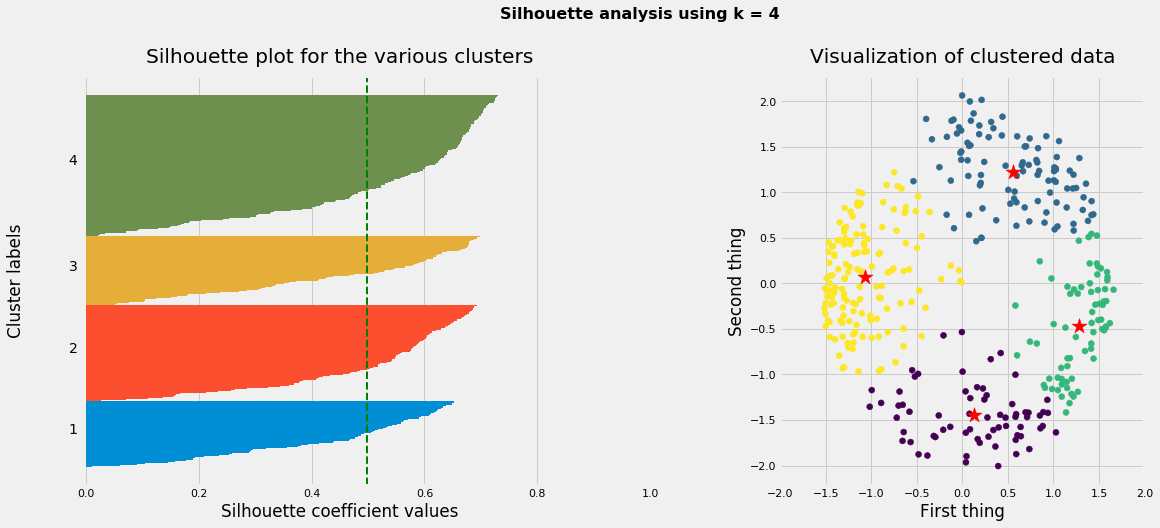

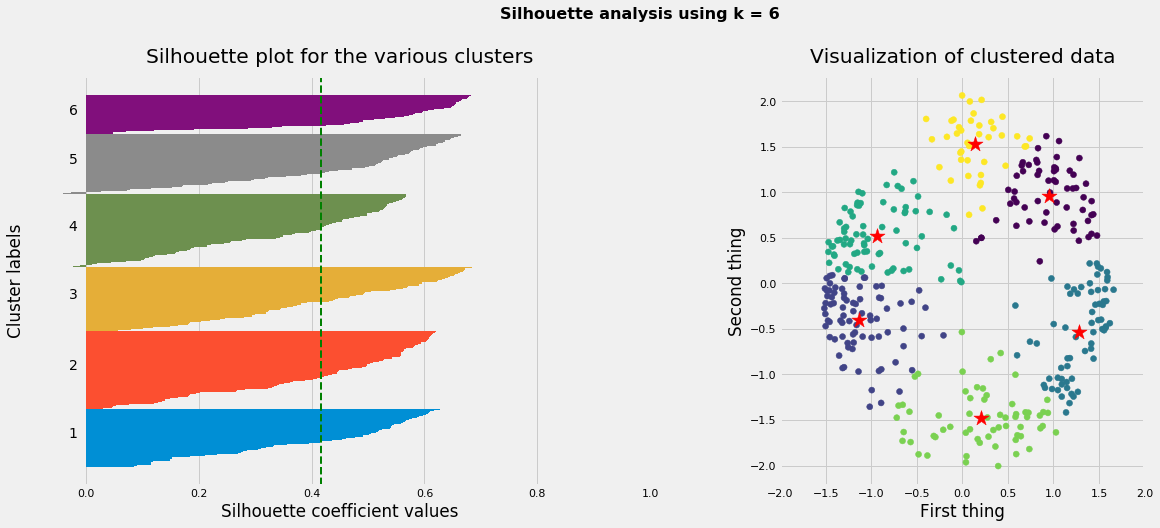

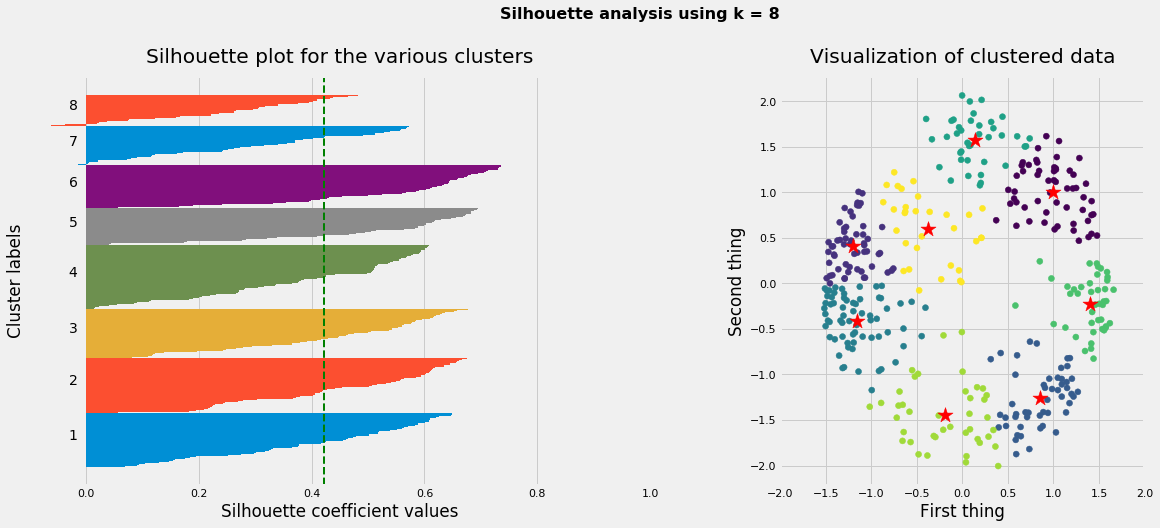

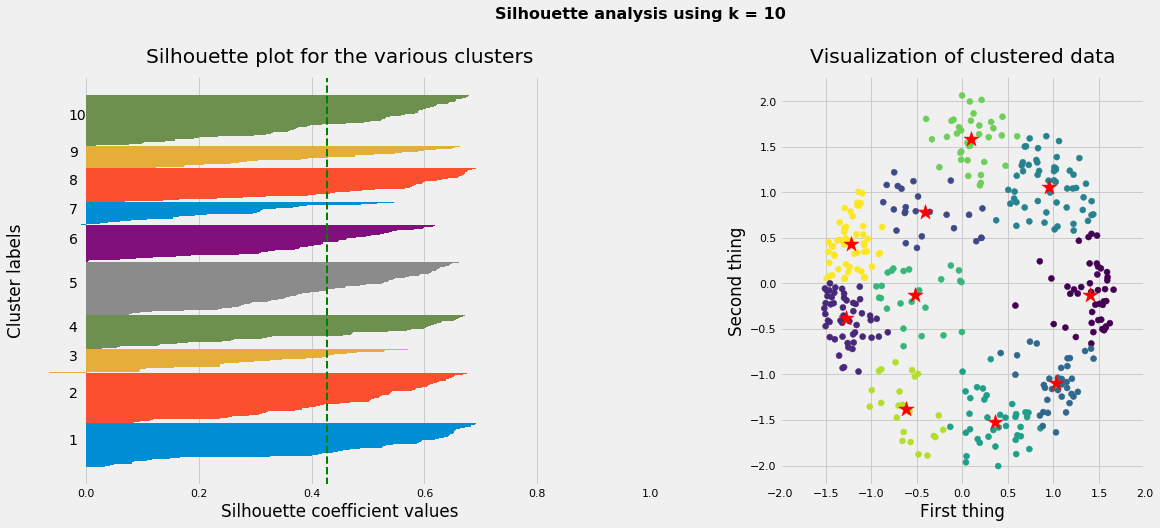

In [21]:
silhouette_analysis(X_std)

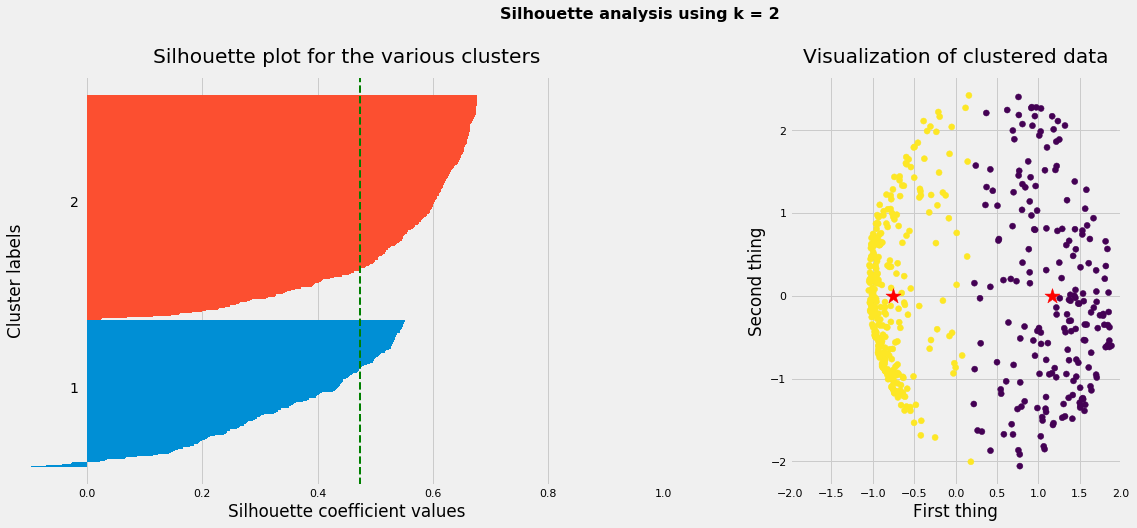

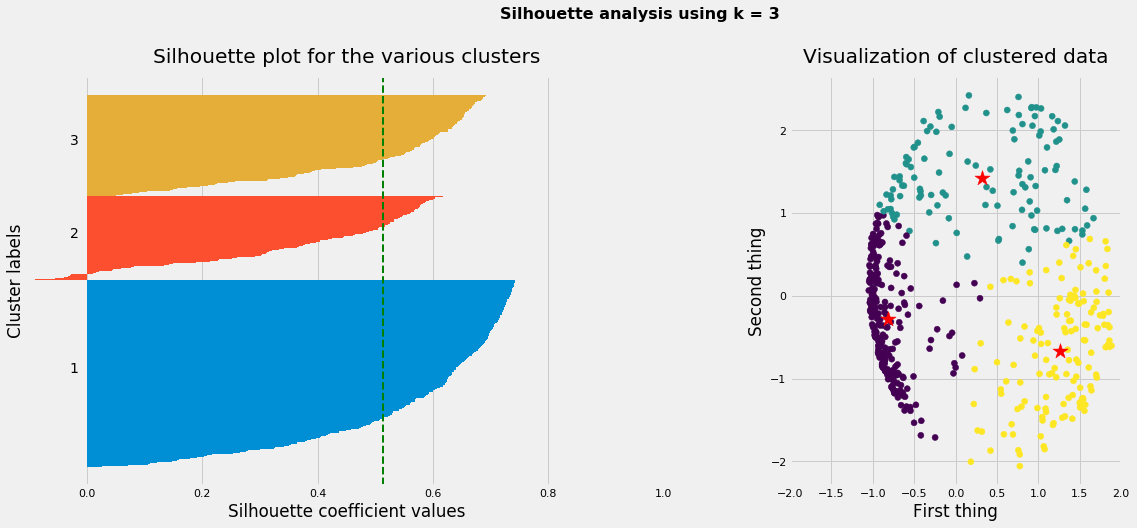

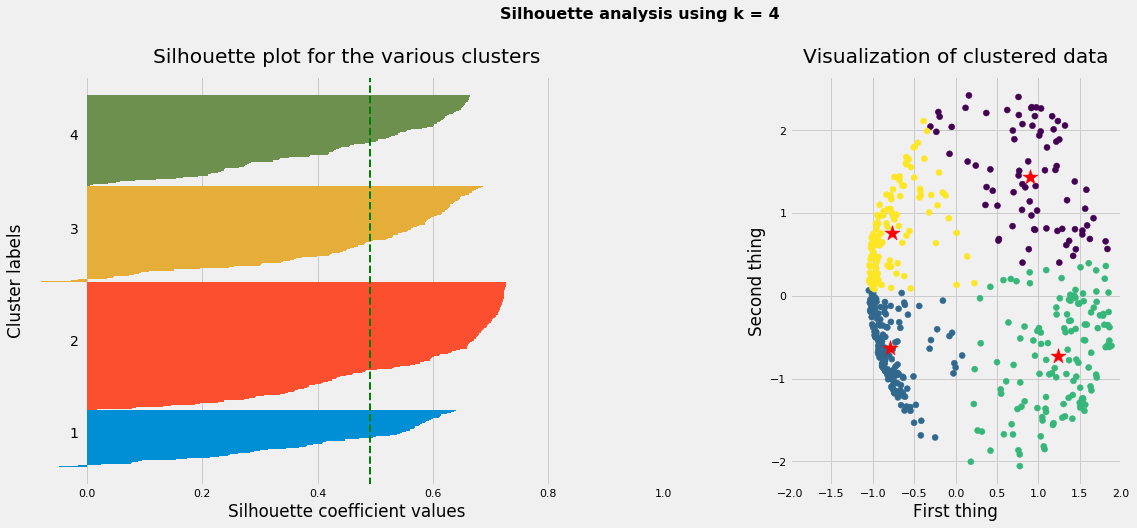

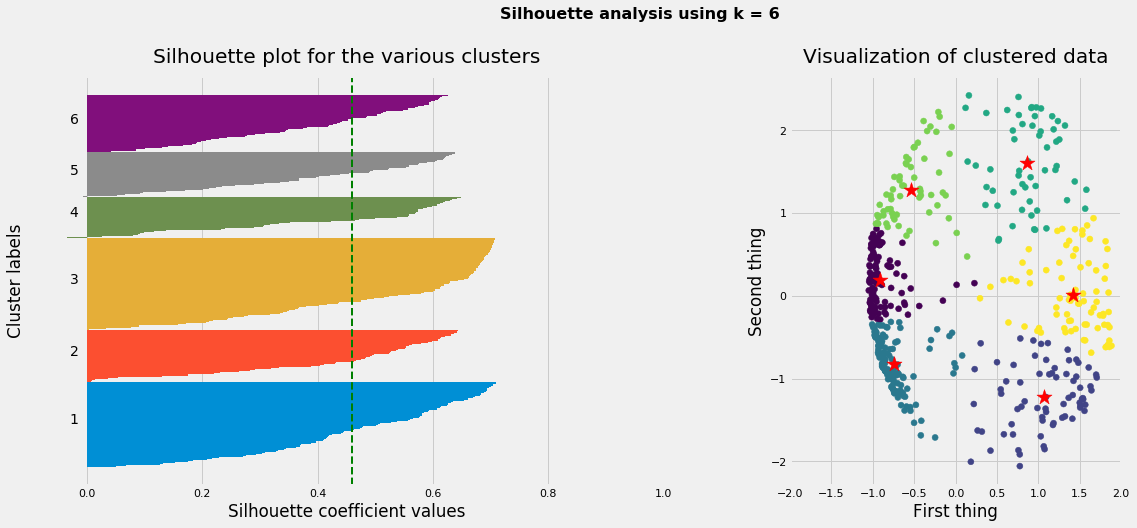

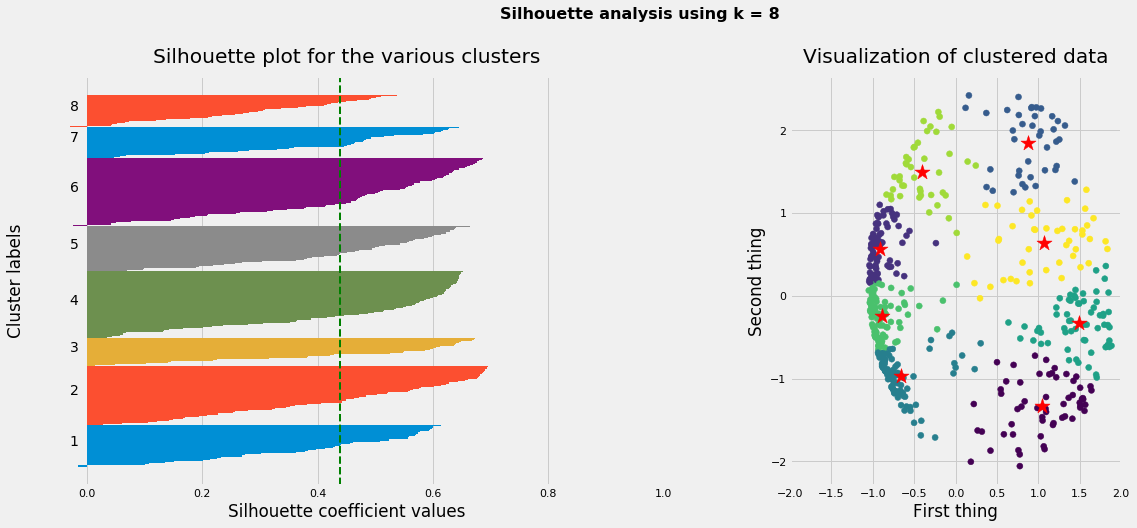

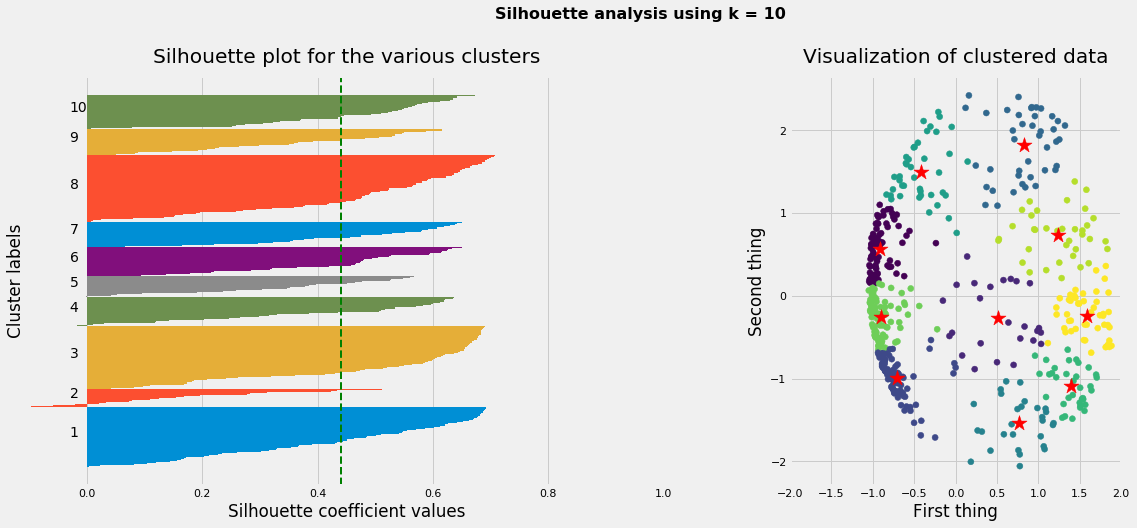

In [22]:
silhouette_analysis(Z_std)

# Spectral Clustering



In [0]:
# Now we will implement the spectral clustering 
import numpy as np
float_formatter = lambda x: "%.3f" % x
np.set_printoptions(formatter={'float_kind':float_formatter})
from sklearn.datasets.samples_generator import make_circles
from sklearn.cluster import SpectralClustering, KMeans
from sklearn.metrics import pairwise_distances
from matplotlib import pyplot as plt
import networkx as nx
import seaborn as sns
sns.set()

Text(0, 0.5, 'p2')

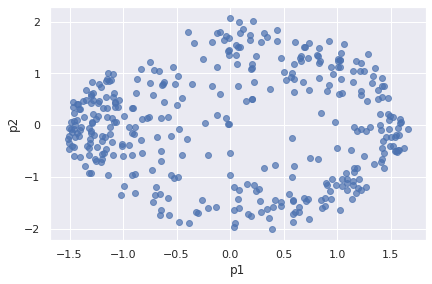

In [24]:
plt.scatter(X_std[:,0], X_std[:,1], alpha=0.7, edgecolors='b')
plt.xlabel('p1')
plt.ylabel('p2')

Implementing Spectral clustering




In [0]:
def RbfKernel(data1, data2, sigma):
    delta =np.matrix(abs(np.subtract(data1, data2)))
    squaredEuclidean = (np.square(delta).sum(axis=1))
    result = np.exp(-(squaredEuclidean)/(2*sigma**2))
    return result
def buildSimmilarityMatrix(dataIn):
    var=1.5
    nData = dataIn.shape[0]
    result = np.matrix(np.full((nData,nData), 0, dtype=np.float))
    for i in range(0,nData):
        for j in range(0, nData):
            weight = RbfKernel(dataIn[i, :], dataIn[j, :], var)
            result[i,j] = weight
    return result

def buildDegreeMatrix(similarityMatrix):
    diag = np.array(similarityMatrix.sum(axis=1)).ravel()
    result = np.diag(diag)
    return result

def unnormalizedLaplacian(simMatrix, degMatrix):
    result = degMatrix - simMatrix
    return result

def transformToSpectral(laplacian):
    global k
    e_vals, e_vecs = LA.eig(np.matrix(laplacian))
    ind = e_vals.real.argsort()[:k]
    result = np.ndarray(shape=(laplacian.shape[0],0))
    for i in range(1, ind.shape[0]):
        cor_e_vec = np.transpose(np.matrix(e_vecs[:,np.asscalar(ind[i])]))
        result = np.concatenate((result, cor_e_vec), axis=1)
    return result
k=10
from scipy import linalg as LA
def transformToSpectral(laplacian):
    global k
    e_vals, e_vecs = LA.eig(np.matrix(laplacian))
    ind = e_vals.real.argsort()[:k]
    result = np.ndarray(shape=(laplacian.shape[0],0))
    for i in range(1, ind.shape[0]):
        cor_e_vec = np.transpose(np.matrix(e_vecs[:,np.asscalar(ind[i])]))
        result = np.concatenate((result, cor_e_vec), axis=1)
    return result


Feed the data to functions to make data ready for Kmeans

In [0]:
def sepctral_clustering( data ):
  
  simMat = buildSimmilarityMatrix(data)
  degMat = buildDegreeMatrix(simMat)
  lapMat = unnormalizedLaplacian(simMat, degMat)
  transformedData = transformToSpectral(lapMat)
  return transformedData



In [0]:
transformedX_Std= sepctral_clustering( X_std )

Now that we have transformed data we implement kmeans on it

In [0]:
kmSX = Kmeans(n_clusters=5, max_iter=100)
kmSX.fit(transformedX_Std)
centroidsSX = kmSX.centroids

We can see that the clusters of this method much different from the kmeans 
clustering

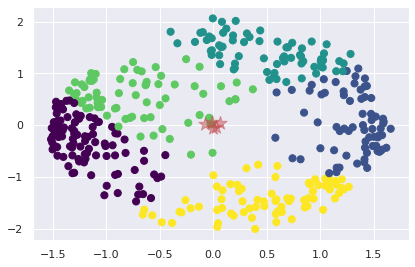

In [41]:
plt.scatter(X_std[:, 0], X_std[:, 1], c=kmSX.labels, s=50, cmap='viridis');
plt.scatter(centroidsSX[:, 0], centroidsSX[:, 1], marker='*', c="r", s=200, alpha=0.5);

Now lets do the same process on the second dataset

In [0]:
transformedZ_Std= sepctral_clustering( Z_std )

In [0]:
kmSZ = Kmeans(n_clusters=10, max_iter=100)
kmSZ.fit(transformedZ_Std)
centroidsSZ = kmSZ.centroids

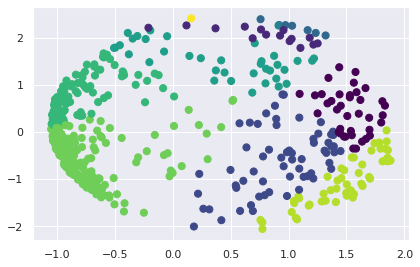

In [44]:
plt.scatter(Z_std[:, 0], Z_std[:, 1], c=kmSZ.labels, s=50, cmap='viridis');
#plt.scatter(centroidsSZ[:, 0], centroidsSZ[:, 1], marker='*', cmap='viridis', s=200, alpha=0.5);


#Both algorithms in MD of both datasets 
Now lets apply both of these algorithms on all of the data not just reduced dimensions

This function cleans data but doesn't reduce the dimensions of it.

In [0]:
def data_cleaner_all(self):
  # Handling the missing values if any 
  self.fillna(method ='ffill', inplace = True) 
    
  # Scaling the Data 
  scaler = StandardScaler() 
  self._scaled = scaler.fit_transform(self) 
  # Normalizing the Data 
  self._normalized = normalize(self._scaled)
  # Converting the numpy array into a pandas DataFrame 
  self._normalized = pd.DataFrame(self._normalized) 

  
  # Standardize the data
  self._std = StandardScaler().fit_transform(self._normalized)
  
  return self._std 

In [0]:
X_all = data_cleaner_all(X)
Z_all = data_cleaner_all(Z)

let's implement local implementation of kmeans on full dimensions of both dataset

In [0]:
#cho dataset
kmX_all = Kmeans(n_clusters=5, max_iter=100)
kmX_all.fit(X_all)
centroidsX_all = kmX_all.centroids

In [0]:
#iyer dataset
kmZ_all = Kmeans(n_clusters=5, max_iter=100)
kmZ_all.fit(Z_all)
centroidsZ_all = kmZ_all.centroids

X_all represents the cho dataset with full dimensions

In [0]:
X_all_transformed = sepctral_clustering (X_all)

Implement kmeans on the cho dataset after being ready by the spectral 
processing 

In [0]:
kmSX_all = Kmeans(n_clusters=5, max_iter=100)
kmSX_all.fit(X_all_transformed)
centroidsSX_all = kmSX_all.centroids

In [0]:
Z_all_transformed = sepctral_clustering (Z_all)

In [0]:
kmSZ_all = Kmeans(n_clusters=10, max_iter=100)
kmSZ_all.fit(Z_all_transformed)
centroidsSZ_all = kmSZ_all.centroids

In [0]:
#Make the ground thruth labels for ploting
Cho_ground_truth_df = pd.DataFrame({'Cho_ground_truth':cho["1.1"]})
Cho_ground_truth_df = Cho_ground_truth_df.sort_values('Cho_ground_truth',axis=0, ascending=True)
Cho_ground_truth=Cho_ground_truth_df['Cho_ground_truth'].value_counts()

In [0]:
#Make the Kmeans 2D On cho dataset labels ready for ploting
Cho_kmeans2D_df = pd.DataFrame({'Cho_kmeans2D':km.labels})
Cho_kmeans2D_df = Cho_kmeans2D_df.sort_values('Cho_kmeans2D',axis=0, ascending=True)
Cho_kmeans2D=Cho_kmeans2D_df['Cho_kmeans2D'].value_counts()

In [0]:
#Make the Kmeans MultiDimensional On cho dataset labels ready for ploting
Cho_kmeansMD_df = pd.DataFrame({'Cho_kmeansMD':kmX_all.labels})
Cho_kmeansMD_df = Cho_kmeansMD_df.sort_values('Cho_kmeansMD',axis=0, ascending=True)
Cho_kmeansMD=Cho_kmeansMD_df['Cho_kmeansMD'].value_counts()

In [0]:
#Make the Spectral 2 dimensioanl On cho dataset labels ready for ploting

Cho_Spectral_2D_df = pd.DataFrame({'Cho_Spectral_2D':kmSX.labels})
Cho_Spectral_2D_df =Cho_Spectral_2D_df.sort_values('Cho_Spectral_2D',axis=0, ascending=True)
Cho_Spectral_2D =Cho_Spectral_2D_df['Cho_Spectral_2D'].value_counts()

In [0]:
#Make the Spectral multi dimensioanl On cho dataset labels ready for ploting

Cho_Spectral_MD_df = pd.DataFrame({'Cho_Spectral_MD':kmSX_all.labels})
Cho_Spectral_MD_df =Cho_Spectral_MD_df.sort_values('Cho_Spectral_MD',axis=0, ascending=True)
Cho_Spectral_MD=Cho_Spectral_MD_df['Cho_Spectral_MD'].value_counts()

In [0]:
#Make the the ground truth of the iyer dataset labels ready for ploting
iyer_ground_truth_df = pd.DataFrame({'iyer_ground_truth':iyer["-1"]})
iyer_ground_truth_df =iyer_ground_truth_df.sort_values('iyer_ground_truth',axis=0, ascending=True)
iyer_ground_truth=iyer_ground_truth_df['iyer_ground_truth'].value_counts()

In [0]:
#Make the kmeans two dimensional On iyer dataset labels ready for ploting
iyer_kmeans2D_df = pd.DataFrame({'iyer_kmeans2D':km2.labels})
iyer_kmeans2D_df =iyer_kmeans2D_df.sort_values('iyer_kmeans2D',axis=0, ascending=True)
iyer_kmeans2D=iyer_kmeans2D_df['iyer_kmeans2D'].value_counts()

In [0]:
#Make the kmeans two dimensional On iyer dataset labels ready for ploting
iyer_kmeansMD_df = pd.DataFrame({'iyer_kmeansMD':kmZ_all.labels})
iyer_kmeansMD_df =iyer_kmeansMD_df.sort_values('iyer_kmeansMD',axis=0, ascending=True)
iyer_kmeansMD=iyer_kmeansMD_df['iyer_kmeansMD'].value_counts()

In [0]:
#Make the Sepctral two dimensional On iyer dataset labels ready for ploting
iyer_Spectral_2D_df = pd.DataFrame({'iyer_Spectral_2D':kmSZ.labels})
iyer_Spectral_2D_df =iyer_Spectral_2D_df.sort_values( 'iyer_Spectral_2D',axis=0, ascending=True)
iyer_Spectral_2D=iyer_Spectral_2D_df['iyer_Spectral_2D'].value_counts()

In [0]:
#Make the Sepctral multi dimensional On iyer dataset labels ready for ploting
iyer_Spectral_MD_df = pd.DataFrame({'iyer_Spectral_MD':kmSZ_all.labels})
iyer_Spectral_MD_df =iyer_Spectral_MD_df.sort_values('iyer_Spectral_MD',axis=0, ascending=True)
iyer_Spectral_MD=iyer_Spectral_MD_df['iyer_Spectral_MD'].value_counts()


In [0]:
cho_col = pd.concat([Cho_ground_truth,Cho_kmeans2D,Cho_kmeansMD,Cho_Spectral_2D,Cho_Spectral_MD,], axis=1)
iyer_col= pd.concat([iyer_ground_truth,iyer_kmeans2D,iyer_kmeansMD,iyer_Spectral_2D,iyer_Spectral_MD,], axis=1)

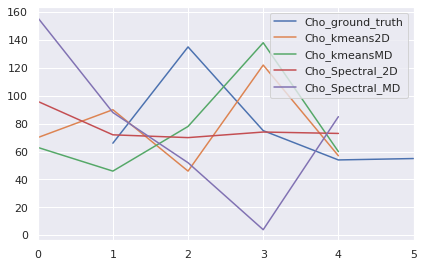

In [64]:
lines = cho_col.plot.line()

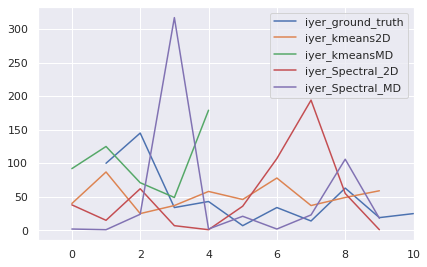

In [65]:
lines = iyer_col.plot.line()